In [1]:
import numpy as np
import pandas as pd

from spatialkfold.blocks import spatial_blocks

import geopandas as gpd

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys,glob

os.chdir("../")
from src.utils import temporalKFold

In [2]:
data = pd.read_csv("./results/CSVs/Train_clean.csv")

# Spatial Sampling

In [3]:
dfsp = data.copy()
dfsp = dfsp[["date","stn_ID","lat","lng"]]

In [4]:
dfsp.head()

,date,stn_ID,lat,lng
0,2016-01-01,454909257,45.496780,9.257515
1,2016-01-01,451709488,45.171919,9.488997
2,2016-01-01,452808988,45.281956,8.988563
3,2016-01-01,455409205,45.542665,9.205603
4,2016-01-01,455408847,45.548517,8.847322


In [5]:
gdf = gpd.GeoDataFrame(dfsp,geometry=gpd.points_from_xy(dfsp.lng, dfsp.lat, crs=4326))

In [6]:
gdf.head()

,date,stn_ID,lat,lng,geometry
0,2016-01-01,454909257,45.496780,9.257515,POINT (9.25751 45.49678)
1,2016-01-01,451709488,45.171919,9.488997,POINT (9.48900 45.17192)
2,2016-01-01,452808988,45.281956,8.988563,POINT (8.98856 45.28196)
3,2016-01-01,455409205,45.542665,9.205603,POINT (9.20560 45.54266)
4,2016-01-01,455408847,45.548517,8.847322,POINT (8.84732 45.54852)


In [7]:
blocks = spatial_blocks(gdf=gdf, width=0.05, height=0.05, 
                                  method='continuous', orientation='tb-lr' ,
                                  nfolds=10, random_state= 175)

In [8]:
# sample the data with the prepared blocks 
stn_block = gpd.overlay (gdf, blocks)

In [9]:
# Get the 'tab20' colormap
cols_tab = cm.get_cmap('tab10', 10)
# Generate a list of colors from the colormap
cols = [cols_tab(i) for i in range(10)]
# create a color ramp
color_ramp = ListedColormap(cols)

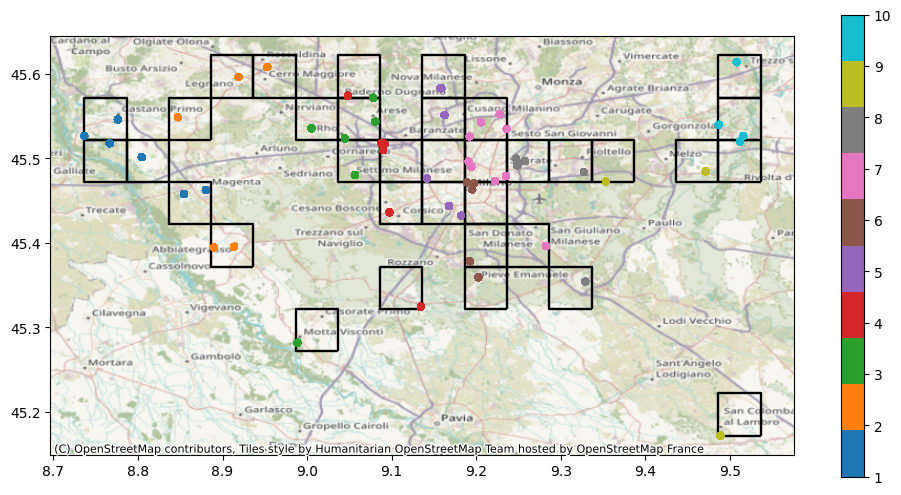

In [10]:
fig, ax = plt.subplots(1,1 , figsize=(12, 6))

blocks.plot(facecolor="none",edgecolor='black', ax = ax ,lw=1.7)
stn_block.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 20, marker="o")

ctx.add_basemap(ax,
               crs=stn_block.crs.to_string(),
               source=ctx.providers.OpenStreetMap.HOT
              )
plt.show()

# Temporal Sampling

In [11]:
dftmp = data.copy()

In [12]:
# Do not forget to parse date when 
dftmp = temporalKFold(dftmp)
dftmp.head()

,date,lat,lng,temperature,precipitation,humidity,global_radiation,hydrometric_level,N,NE,...,lc_21,lc_22,lc_23,lc_31,lc_32,lc_33,lc_41,lc_51,stn_ID,temp_fold
14,2016-01-02,45.496780,9.257515,5.897203,0.2,90.146853,46.167832,67.038430,1.712500,2.177273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454909257,1
15,2016-01-02,45.171919,9.488997,5.830556,0.0,99.722222,47.569444,9.483143,2.877778,3.108462,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,451709488,1
16,2016-01-02,45.281956,8.988563,5.954861,0.0,100.000000,63.875000,8.689238,1.050000,2.989362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452808988,1
17,2016-01-02,45.542665,9.205603,5.852448,0.0,98.230769,57.139860,3.840894,1.450000,1.607143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455409205,1
18,2016-01-02,45.548517,8.847322,6.143056,0.0,95.159722,62.076389,9.552806,1.526389,2.426364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455408847,1


In [13]:
temporalKFold(dftmp).temp_fold.unique()

array([1, 2, 3, 4, 5])

In [14]:
dftmp_sample = dftmp[dftmp.date <= "31.1.2016"].set_index("date")

In [15]:
dftmp_sample.temp_fold.unique()

array([1, 2, 3, 4, 5])

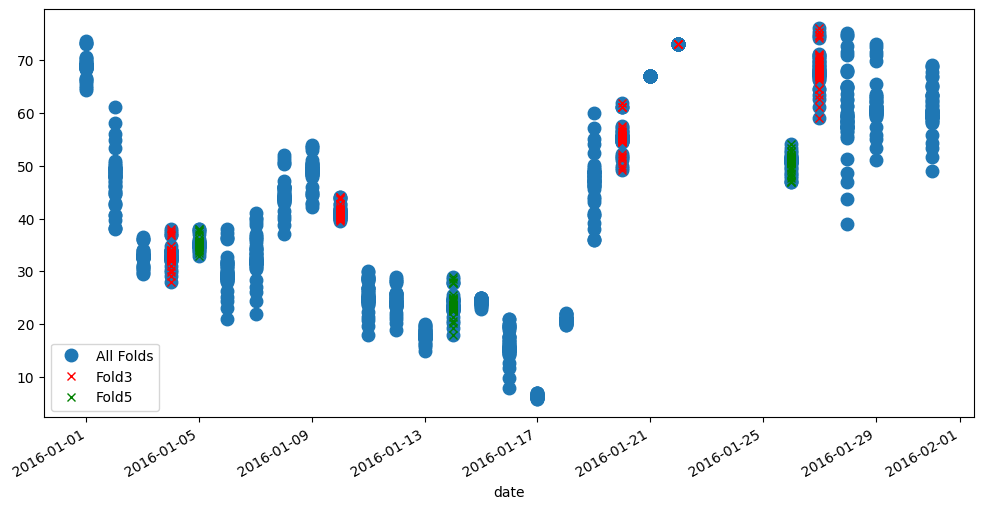

In [19]:
fig, ax = plt.subplots(1,1 , figsize=(12, 6))
dftmp_sample["pm25"].plot(style='.',ax=ax,markersize=18)
dftmp_sample[dftmp_sample.temp_fold==5]["pm25"].plot(style='x',ax=ax,color="red")
dftmp_sample[dftmp_sample.temp_fold==3]["pm25"].plot(style='x',ax=ax, color="green")
plt.legend(["All Folds", "Fold3","Fold5"])
plt.show()